First we have to install pymtsql....

In [1]:
!pip install pymysql

After that we have to import pymysql and connect with our my sql server... 

In [2]:
import pymysql
connection=pymysql.connect(host='localhost',user='root',password='4b92bdmtsu',database='crime_db')
connection

Lets disable first warning notification...

In [3]:
import warnings
warnings.filterwarnings('ignore')

Lets import pandas and run our sql query with python....

In [4]:
import pandas as pd
query='select * from crime_data'
df= pd.read_sql(query,connection)
df

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


So our Total number or records are 499  is this dataset..

Lets fatch some unique values form crm_cd and CRM_cd_desc...

In [5]:
query='select count(distinct(Crm_Cd)),count(distinct(Crm_Cd_Desc)) from crime_data;'
df=pd.read_sql(query,connection)
df


,count(distinct(Crm_Cd)),count(distinct(Crm_Cd_Desc))
0,42,42


The count of unique value is 42

In [6]:
query='select distinct(Crm_Cd),Crm_Cd_Desc from crime_data;'
df=pd.read_sql(query,connection)
df

,Crm_Cd,Crm_Cd_Desc
0,624,BATTERY - SIMPLE ASSAULT
1,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
3,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4,946,OTHER MISCELLANEOUS CRIME
5,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
6,330,BURGLARY FROM VEHICLE
7,930,CRIMINAL THREATS - NO WEAPON DISPLAYED
8,648,ARSON
9,354,THEFT OF IDENTITY


These are those unique values

First we have to import all important lib... for Data visualization and for better understanding...

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import pandas as pd

In [8]:

query='''

SELECT DATE_FORMAT(str_to_date(date_occ, '%m-%d-%Y'), '%Y-%m') AS crm_months,
       COUNT(*) AS count
FROM crime_data
GROUP BY crm_months
ORDER BY crm_months;

'''
df= pd.read_sql(query,connection)
df

,crm_months,count
0,2020-01,314
1,2020-02,130
2,2020-03,4
3,2020-04,5
4,2020-05,5
5,2020-06,6
6,2020-07,3
7,2020-08,3
8,2020-09,5
9,2020-10,4


These are the case occures by the months

Lets visualize this trends by the help of line plot....

In [9]:
import plotly.express as px
import seaborn as sns
df= pd.read_sql(query,connection)
df
line_fig = px.line(df,x='crm_months', y='count', title='Crime occurrence over the months')
line_fig.update_layout(height=400, width=800)
line_fig.update_xaxes(title_text='Months') 
line_fig.update_yaxes(title_text='No. of Crimes') 
line_fig.show()

So the most crimes are occurred in Jan=314 and Feb=130 in 2020

In [10]:
query='select LAT,LON from crime_data'
df=pd.read_sql(query,connection)
df

,LAT,LON
0,34.01,-118.30
1,34.05,-118.25
2,34.17,-118.40
3,34.22,-118.45
4,34.05,-118.26
...,...,...
494,34.05,-118.26
495,34.05,-118.26
496,34.05,-118.25
497,34.05,-118.25


 These are the geographical information (Latitude and Longitude) to perform spatial analysis.

Lets create a scatter plot for more easy understanding......

In [11]:
fig=px.scatter(df,x='LON',y='LAT',title='Crime Occurrence(Spatial)')
fig.update_layout(height=500, width=800)
fig.update_xaxes(title_text='Longitude')
fig.update_yaxes(title_text='Latitude')
fig.show()



So most of the cases occurred in the LON=188.25 and LAT=34.05

---If we want to show the crime hotspot in map so we have to install folium...

In [12]:
!pip install folium

In [13]:
import folium
from folium.plugins import HeatMap
import pandas as pd
query='select LAT,LON from crime_data'
df=pd.read_sql(query,connection)
crime_map= folium.Map(location=[df['LAT'].mean(),df['LON'].mean()],zoom_start=10)

for _, row in df.iterrows():
    folium.Marker(location=[row['LAT'],row['LON']]).add_to(crime_map)

heatmap_data=[[row['LAT'],row['LON']] for _, row in df.iterrows()]
HeatMap(heatmap_data).add_to(crime_map)

crime_map.save('crime_map.html')
crime_map

All the crime hotspots are there....

In [14]:
import seaborn as sns
query='''SELECT Vict_Age,Vict_Sex
FROM crime_data
where Vict_Age >0'''
df=pd.read_sql(query,connection)

#handling missing values
df.dropna(subset=['Vict_Age','Vict_Sex'],inplace=True)

#Distribution of victim Ages
histogram_fig = px.histogram(df, x='Vict_Age', title='Distribution of victim Ages', nbins=15)
histogram_fig.update_xaxes(title_text='Age')
histogram_fig.update_yaxes(title_text='Frequency')
histogram_fig.show()


Most victim's Age is b/w 25-29

In [15]:
# Distribution of victim Genders
plt.figure(figsize=(9,3))
histogram_fig = px.histogram(df, x='Vict_Sex', title='Distribution of victim Ages', nbins=15,color="Vict_Sex")
histogram_fig.update_xaxes(title_text='Sex')
histogram_fig.update_yaxes(title_text='Frequency')
histogram_fig.show()


<Figure size 900x300 with 0 Axes>

Distribution of Male victim is more than female victim...

Identify Common Premises 

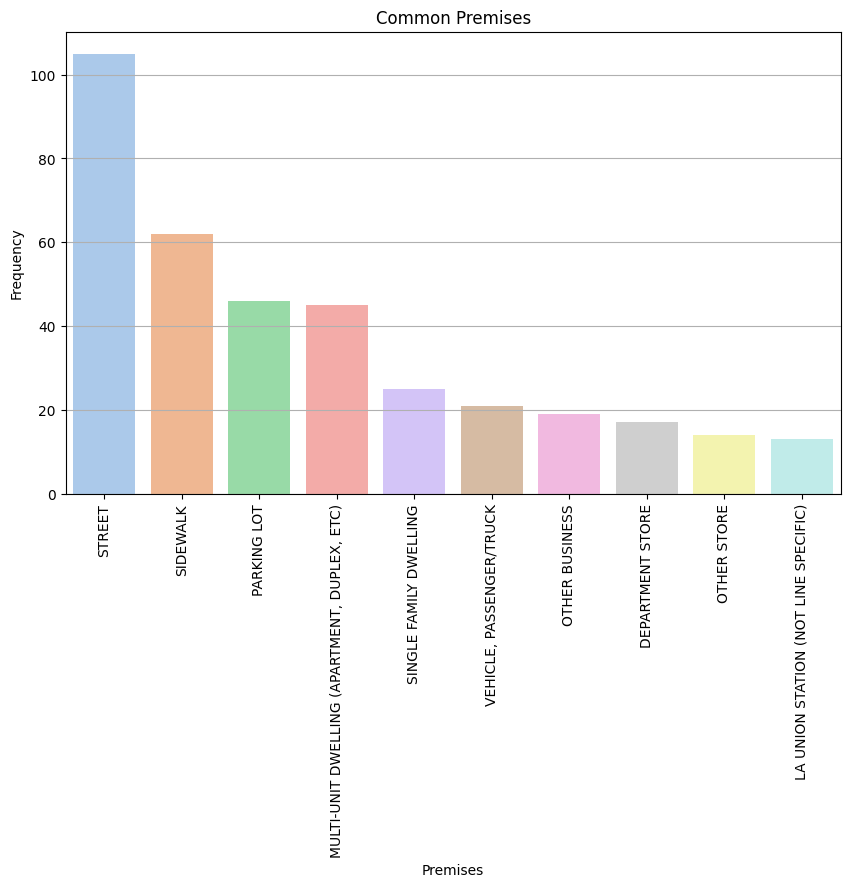

In [16]:
query = '''select Premis_Desc from crime_data'''
df= pd.read_sql(query,connection)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Premis_Desc', order=df['Premis_Desc'].value_counts().index[:10],palette='pastel')
plt.title("Common Premises")
plt.xlabel('Premises')
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()


Most of the crime are occurred in Street than Sidewalk than panking lot

----Retriving status data

In [17]:
query= 'select status from crime_data'
df=pd.read_sql(query,connection)
#Classify crime by status
status_counts = df['status'].value_counts()
status_counts



status
IC    447
AA     27
AO     24
JO      1
Name: count, dtype: int64

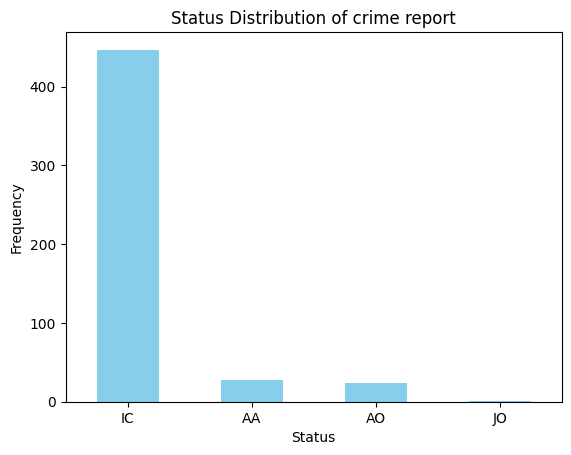

In [18]:
status_counts.plot( kind='bar',color='skyblue')
plt.title('Status Distribution of crime report')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

80% of cases are investigated just few are left

----

----

Questions

Spatial Analysis:

1) Where are the geographical hotspots for reported crimes?

Ans: The los angeles of california states b/w latitude 34 degree and longitude -118.30 degree to -118.20 is significant hotspot for reported crimes.

2) What is the distribution of victim ages in reported crimes?

Ans: In above Analysis we can say that from age group 25 to 29 the number of records are high.

3. Is there a significant difference in crime rates between male and female victims?

Ans: There is significant difference in crime rate b/w male and female victims,
  Male victimes has commited more crimes than female victimes
  Male crime rate 250 and female crime rate is 149


4. Where do most crimes occur based on the "Location" column?

In [19]:
#Ans: 
query= '''select location,count(location) as crime_occurred from crime_data group by location
order by count(location) desc
limit 5'''
df= pd.read_sql(query,connection)
df

,location,crime_occurred
0,800 N ALAMEDA ST,14
1,700 W 7TH ST,11
2,300 E 5TH ST,6
3,1100 S FIGUEROA ST,6
4,6TH,6


5. What is the distribution of reported crimes based on Crime Code?

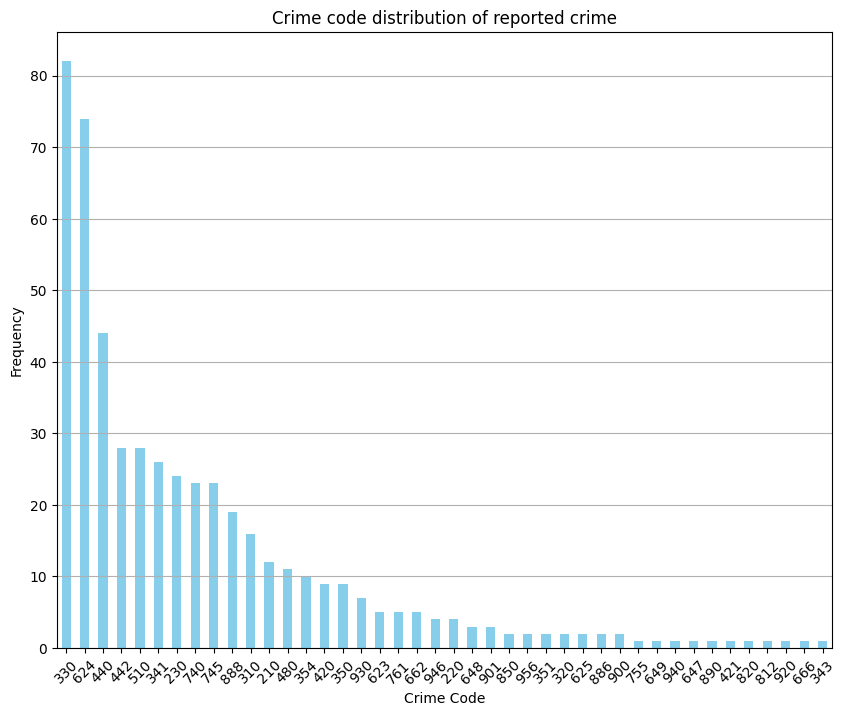

Crime code counts:
Crm_cd
330    82
624    74
440    44
442    28
510    28
341    26
230    24
740    23
745    23
888    19
310    16
210    12
480    11
354    10
420     9
350     9
930     7
623     5
761     5
662     5
946     4
220     4
648     3
901     3
850     2
956     2
351     2
320     2
625     2
886     2
900     2
755     1
649     1
940     1
647     1
890     1
421     1
820     1
812     1
920     1
666     1
343     1
Name: count, dtype: int64


In [20]:
#Ans: 
query='select Crm_cd from crime_data'
# fatching data from dataframe
crime_code_data= pd.read_sql(query,connection)
crime_code_counts=crime_code_data['Crm_cd'].value_counts()
plt.figure(figsize=(10, 8))
crime_code_counts.plot(kind='bar',color='skyblue')
plt.title('Crime code distribution of reported crime')
plt.xlabel('Crime Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#print crime code counts
print ('Crime code counts:')
print(crime_code_counts)

